<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regressions**

**Types of Regressions**

- Linear Regression: Models the relationship between variables by fitting a straight line (y = mx + b).

   - Simple Linear Regression: One independent variable.
   - Multiple Linear Regression: More than one independent variable.

- Logistic Regression: Used when the dependent variable is binary (e.g., yes/no, true/false).

- Polynomial Regression: Models the relationship as a polynomial (y = ax^2 + bx + c), used for more complex relationships.

- Ridge, Lasso, and Elastic Net Regression: Variations of linear regression that handle multicollinearity and feature selection.

### **Linear Regression**

#### **Simple Linear Regression (SLR)**
Technically this means one predictor is linearly related to the response.
	$$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters.

Once they are estimated, the estimated fit becomes
	$$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

There are various ways of estimating the coefficients. The most common approach is via the least squares technique.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/Advertising.csv'
adv = pd.read_csv(file_path)
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


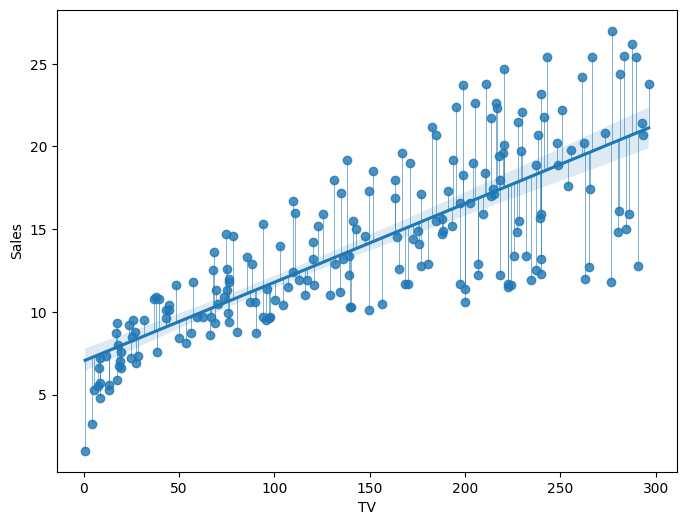

In [ ]:
#The np.polyfit function is used in this context to perform a polynomial fit, which, in the case of deg=1, is equivalent to performing a linear fit

fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + adv['TV'] * fit[0]

plt.figure(figsize=(8, 6))
sns.regplot(x='TV', y='Sales', data=adv)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [ ]:
np.polyfit?

In [ ]:
fit

array([0.04753664, 7.03259355])

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results1 = smf.ols('Sales ~ TV', data=adv).fit()

In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.47e-42
Time:                        06:17:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the OLS regression results involves understanding the various statistics provided. Here is a detailed breakdown:

**Summary Statistics**

- Dep. Variable: Sales

   - The dependent variable in the regression model is Sales.

- R-squared: 0.612

    - This indicates that 61.2% of the variance in Sales is explained by the TV advertising budget. This is a measure of the goodness-of-fit of the model.

- Adj. R-squared: 0.610

   - The adjusted R-squared adjusts the R-squared value based on the number of predictors in the model. It is slightly lower than the R-squared value, which accounts for the model complexity.

- F-statistic: 312.1

   - This tests whether at least one of the predictors' coefficients is different from zero. A high F-statistic suggests that the model is a good fit for the data.

- Prob (F-statistic): 1.47e-42

   - This is the p-value associated with the F-statistic. A very small p-value (close to zero) indicates that the overall model is statistically significant.

- Log-Likelihood: -519.05

   - This is the log of the likelihood function. It is used in model comparison.

- AIC (Akaike Information Criterion): 1042

   - This is a measure of the relative quality of the model. Lower AIC values indicate a better model.

- BIC (Bayesian Information Criterion): 1049

   - Similar to AIC but includes a penalty for the number of parameters in the model. Lower values indicate a better model.


**Coefficients Table**

- Intercept: 7.0326

   - This is the estimated value of Sales when TV is zero. The intercept is statistically significant (p-value = 0.000).

- TV: 0.0475

   -This is the estimated increase in Sales for each unit increase in the TV advertising budget. The coefficient is statistically significant (p-value = 0.000).


**Interpretation Summary**

- The model explains about 61.2% of the variance in Sales, which suggests a good fit.
- Both the intercept and the TV coefficient are statistically significant, indicating a significant relationship between TV advertising budget and Sales.
- The model has a significant F-statistic, indicating that the model is statistically significant.
- The residuals appear to be normally distributed, and there is no evidence of autocorrelation or significant multicollinearity issues.

In conclusion, the results suggest that there is a significant positive relationship between the TV advertising budget and Sales, and the model provides a good fit to the data.

*The model has a significant F-statistic, indicating that the model is statistically significant.*

To confirm that the model has a significant F-statistic, indicating that the model is statistically significant, you should look at the p-value associated with the F-statistic. Here’s how you can interpret this:

1. **F-statistic and p-value:**

- The F-statistic tests the null hypothesis that all regression coefficients are equal to zero (except the intercept).
- The p-value associated with the F-statistic tells you the probability of observing an F-statistic as extreme as, or more extreme than, the one calculated from your sample data if the null hypothesis is true.

2. **Interpreting the p-value:**

- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, thus you reject the null hypothesis.
- In your output, the Prob (F-statistic) is 1.47e-42, which is an extremely small p-value.

Given your model output:

- F-statistic: 312.1
- Prob (F-statistic): 1.47e-42

Steps to Confirm Statistical Significance:

1. **Check the F-statistic:**

- The value of the F-statistic is 312.1, which is a very high value, suggesting that at least one predictor is significantly related to the dependent variable.

2. **Check the p-value associated with the F-statistic:**

- The p-value 1.47e-42 (which is essentially 0.000...0147 with many zeros before 147) is much smaller than the typical alpha level of 0.05.
- Since the p-value is much less than 0.05, you reject the null hypothesis that all coefficients are equal to zero.

In [ ]:
# Simple linear regression with newspaper
results2 = smf.ols('Sales ~ Newspaper', data=adv).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 23 May 2024   Prob (F-statistic):            0.00115
Time:                        07:10:23   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results3 = smf.ols('Sales ~ Radio', data=adv).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 23 May 2024   Prob (F-statistic):           4.35e-19
Time:                        07:10:35   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Model Comparison**

**1. Model 1: Sales ~ TV**

- R-squared: 0.612
- Adj. R-squared: 0.610
- F-statistic: 312.1
- Prob (F-statistic): 1.47e-42
- AIC: 1042
- BIC: 1049
- Intercept: 7.0326 (p-value = 0.000)
- TV: 0.0475 (p-value = 0.000)
- Durbin-Watson: 1.935
- Prob(Omnibus): 0.767
- Skew: -0.089
- Kurtosis: 2.779

**2. Model 2: Sales ~ Newspaper**

- R-squared: 0.052
- Adj. R-squared: 0.047
- F-statistic: 10.89
- Prob (F-statistic): 0.00115
- AIC: 1221
- BIC: 1227
- Intercept: 12.3514 (p-value = 0.000)
- Newspaper: 0.0547 (p-value = 0.001)
- Durbin-Watson: 1.983
- Prob(Omnibus): 0.044
- Skew: 0.330
- Kurtosis: 2.527

**3. Model 3: Sales ~ Radio**

- R-squared: 0.332
- Adj. R-squared: 0.329
- F-statistic: 98.42
- Prob (F-statistic): 4.35e-19
- AIC: 1151
- BIC: 1157
- Intercept: 9.3116 (p-value = 0.000)
- Radio: 0.2025 (p-value = 0.000)
- Durbin-Watson: 1.946
- Prob(Omnibus): 0.000
- Skew: -0.764
- Kurtosis: 3.544

**Key Points for Comparison**

1. R-squared and Adjusted R-squared:

- **Model 1** has the highest R-squared (0.612) and adjusted R-squared (0.610), indicating that it explains the largest proportion of the variance in Sales.

- **Model 3** has a moderate R-squared (0.332) and adjusted R-squared (0.329), while **Model 2** has the lowest R-squared (0.052) and adjusted R-squared (0.047).

2. F-statistic and Prob (F-statistic):

- **Model 1** has the highest F-statistic (312.1) and a very small p-value (1.47e-42), indicating strong evidence that the model is statistically significant.
- **Model 3** also has a significant F-statistic (98.42) with a small p-value (4.35e-19).
- **Model 2** has a lower F-statistic (10.89) and a p-value (0.00115), indicating statistical significance but not as strong as the other models.

3. AIC and BIC:

- **Model 1** has the lowest AIC (1042) and BIC (1049), suggesting it is the best fit among the three models considering the number of predictors.
- **Model 3** has higher AIC (1151) and BIC (1157) than **Model 1** but lower than **Model 2**.
- **Model 2** has the highest AIC (1221) and BIC (1227), indicating the worst fit.

4. Durbin-Watson Statistic:

All models have Durbin-Watson statistics close to 2, indicating no significant autocorrelation in the residuals.

5. Normality of Residuals:

- **Model 1** shows no significant deviation from normality (Prob(Omnibus) = 0.767).
- **Model 2** has some deviation from normality (Prob(Omnibus) = 0.044).
- **Model 3** shows significant deviation from normality (Prob(Omnibus) = 0.000).

#### **Conclusion**

Based on the comparison, **Model 1**: Sales ~ TV is the best model as it has the highest R-squared, the lowest AIC and BIC, and a highly significant F-statistic with a very small p-value. It explains the largest proportion of the variance in Sales and provides a better fit compared to the other models.

- Reference: Use **Model 1** for the most reliable predictions of Sales based on the TV advertising budget.

#### **Multiple Linear Regression (MLR)**

**Multiple Linear Regression** is a statistical technique used to understand the relationship between one dependent variable (the response variable) and two or more independent variables (the predictors). In simple terms, it helps us see how changes in several input factors affect an output.

For example, if you want to predict a student's test score (response) based on the number of hours they studied, their attendance rate, and their previous test scores (predictors), you would use multiple linear regression.

Key Questions in Multiple Linear Regression

1. Is at least one of the predictors
$X_1,X_2, \ldots, X_p$ useful in predicting the response?

- To determine this, we look at the overall F-statistic of the model. This statistic tests the null hypothesis that all regression coefficients are equal to zero, which means none of the predictors are useful.
- If the p-value associated with the F-statistic is very small (typically less than 0.05), we reject the null hypothesis, concluding that at least one of the predictors is useful in predicting the response.

2. Do all the predictors help to explain 𝑌, or is only a subset of the predictors useful?

- This question can be answered by looking at the p-values for each predictor in the model.
- If the p-value for a predictor is less than 0.05, it indicates that the predictor is statistically significant and helps explain the response variable
𝑌.
- Predictors with high p-values (greater than 0.05) might not be useful and could be removed from the model. This process is known as model simplification or variable selection.

3. How well does the model fit the data?

To evaluate the fit of the model, we commonly use two metrics:
R$^2$ (R-squared) and the Residual Standard Error (RSE).

**R-squared (R$^2$ ):**

- R$^2$ measures the proportion of the variance in the response variable that is explained by the predictors. It ranges from 0 to 1.
- A higher R$^2$
  value indicates a better fit, meaning the model explains a larger portion of the variance.

**Residual Standard Error (RSE):**

- RSE measures the standard deviation of the residuals (the differences between observed and predicted values). It gives an absolute measure of the typical size of the prediction errors.
- Lower RSE values indicate a better fit, as it means the model's predictions are closer to the actual values.

**Summary**

Multiple linear regression helps us understand the impact of several factors on a response variable. We check if at least one predictor is useful, determine which predictors are most useful, and evaluate the model's fit using R$^2$and RSE.

In [ ]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.58e-96
Time:                        08:15:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary Statistics

1. Dep. Variable: Sales

- The dependent variable in the regression model is Sales.

2. R-squared: 0.897

- This indicates that 89.7% of the variance in Sales is explained by the TV, Newspaper, and Radio advertising budgets. This is a measure of the goodness-of-fit of the model.

3. Adj. R-squared: 0.896

- The adjusted R-squared value accounts for the number of predictors in the model. It is slightly lower than the R-squared value, which is expected when adding more predictors.

4. F-statistic: 570.3

- This tests whether at least one of the predictors' coefficients is different from zero. A high F-statistic suggests that the model is a good fit for the data.

5. Prob (F-statistic): 1.58e-96

- This is the p-value associated with the F-statistic. A very small p-value (close to zero) indicates that the overall model is statistically significant.

6. Log-Likelihood: -386.18

- This is the log of the likelihood function. It is used in model comparison.

7. AIC (Akaike Information Criterion): 780.4

- This is a measure of the relative quality of the model. Lower AIC values indicate a better model.

8. BIC (Bayesian Information Criterion): 793.6

- Similar to AIC but includes a penalty for the number of parameters in the model. Lower values indicate a better model.

**Coefficients Table**

1. Intercept: 2.9389

- This is the estimated value of Sales when all predictors (TV, Newspaper, Radio) are zero. The intercept is statistically significant (p-value = 0.000).

2. TV: 0.0458

- This is the estimated increase in Sales for each unit increase in the TV advertising budget. The coefficient is statistically significant (p-value = 0.000).

3. Newspaper: -0.0010

- This is the estimated change in Sales for each unit increase in the Newspaper advertising budget. The coefficient is not statistically significant (p-value = 0.860).

4. Radio: 0.1885

- This is the estimated increase in Sales for each unit increase in the Radio advertising budget. The coefficient is statistically significant (p-value = 0.000).

**Interpretation of Key Questions**

**1. Is at least one of the predictors useful in predicting the response?**

- Yes, the overall model is statistically significant (p-value = 1.58e-96), indicating that at least one of the predictors is useful.

**2. Do all the predictors help to explain 𝑌, or is only a subset of the predictors useful?**

- Not all predictors are useful. The p-value for Newspaper (0.860) is not significant, suggesting that it does not contribute to predicting Sales. On the other hand, TV and Radio are statistically significant predictors.

**3. How well does the model fit the data?**

- The model fits the data very well, as indicated by the high R-squared value (0.897). This means that 89.7% of the variance in Sales is explained by the predictors.
- The Residual Standard Error (RSE) can also be considered for a detailed fit assessment, but it is not provided in the summary. Generally, lower RSE indicates a better fit.

**Conclusion**

- The multiple linear regression model Sales ~ TV + Newspaper + Radio explains a significant portion of the variance in Sales.
- TV and Radio are significant predictors, while Newspaper is not.
- The model is statistically significant overall, and it fits the data well, though there are some indications that the residuals are not perfectly normally distributed.

In [ ]:
results = smf.ols('Sales ~ TV + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 23 May 2024   Prob (F-statistic):           4.83e-98
Time:                        08:23:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **A2: Selecting a subset of a model**
In the above model, Newspaper does not appear to have a relationship with sales and hence would be a good candidate to drop from our model. But if the number of predictors were more, it might be troubling to manually fit many models and hand-select which variables to include in the model. Forward, backward and mixed selection processes can be used to find a better model. All of these selection models make their variable selection based on some statistic - AIC, BIC, Mallows CP, Adjusted R-squared

* Forward - starts with an empty model and adds one variable at a time until the statistic is maximized
* Backward - starts with a full model and removes one variable at a time
* Mixed - starts empty and either removes or adds a variable at each step

## **Categorical predictor variables**
Variables that are non-numeric or are numerical but represent categories are called categorical variables. Also called qualitative or factor variables.

In [4]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/Credit.csv'
credit = pd.read_csv(file_path)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [5]:
credit['Female'] = (credit.Gender == 'Female').astype(int)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,1
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0


In [7]:
import statsmodels.formula.api as smf

In [8]:
results = smf.ols('Balance ~ Female', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Fri, 24 May 2024   Prob (F-statistic):              0.669
Time:                        00:14:31   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary Statistics**

1. **Dep. Variable: Balance**

- The dependent variable in the regression model is Balance.
2. **R-squared: 0.000**

- This indicates that the Female variable explains 0% of the variance in Balance. Essentially, the model does not explain any of the variability in Balance.
3. **Adj. R-squared: -0.002**

- The adjusted R-squared value is slightly negative, which can happen when the R-squared value is very low and there is only one predictor. It suggests that the model does not improve on simply predicting the mean of the dependent variable.
4. **F-statistic: 0.1836**

- This tests whether the regression model as a whole is useful. A low F-statistic value indicates that the model is not statistically significant.
5. **Prob (F-statistic): 0.669**

- This is the p-value associated with the F-statistic. A high p-value (greater than 0.05) indicates that the overall model is not statistically significant.
6. **Log-Likelihood: -3019.3**

- This is the log of the likelihood function. It is used in model comparison.
7. **AIC (Akaike Information Criterion): 6043**

- This is a measure of the relative quality of the model. Lower AIC values indicate a better model, but in this case, the high value indicates a poor fit.
8. **BIC (Bayesian Information Criterion): 6051**

- Similar to AIC but includes a penalty for the number of parameters in the model. Lower values indicate a better model, but the high value here also indicates a poor fit.

**Coefficients Table**

1. **Intercept: 509.8031**

- This is the estimated average balance for males (assuming Female is coded as 0 for males and 1 for females). The intercept is statistically significant (p-value = 0.000).
2. **Female: 19.7331**

- This is the estimated difference in balance between females and males. However, the coefficient is not statistically significant (p-value = 0.669), suggesting that being female does not have a significant impact on the balance.

**Interpretation of Key Questions**
1. **Is at least one of the predictors useful in predicting the response?**

- No, the model as a whole is not statistically significant (p-value = 0.669), indicating that the predictor Female is not useful in predicting Balance.
2. **Do all the predictors help to explain
𝑌, or is only a subset of the predictors useful?**

- In this simple regression model with only one predictor, the predictor Female does not help to explain Balance (p-value = 0.669).
3. **How well does the model fit the data?**

- The model does not fit the data well. The R-squared value is 0.000, indicating that the predictor Female explains none of the variance in Balance. The high AIC and BIC values also suggest a poor model fit.

**Conclusion**

The simple linear regression model Balance ~ Female does not provide a good fit for the data. The predictor Female is not statistically significant and does not explain any of the variance in Balance. The overall model is not statistically significant, and the residuals are not normally distributed. This indicates that the variable Female does not have a meaningful impact on predicting the balance in this dataset.

In [9]:
results = smf.ols('Balance ~ Female + Age + Income', data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     37.71
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.86e-21
Time:                        00:25:00   Log-Likelihood:                -2969.1
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     396   BIC:                             5962.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    346.9171     73.475      4.722      0.000     202.468     491.367
Female        24.7561     40.728      0.608      0.544     -55.315     104.827
Age           -2.1894      1.200     -1.825      0.069      -4.548       0.169
Income         6.2400      0.587     10.626      0.000       5.085       7.395
==============================================================================
Omnibus:                       41.176   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.051
Skew:                           0.368   Prob(JB):                     4.43e-05
Kurtosis:                       2.186   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary Statistics**

1. **Dep. Variable: Balance**

- The dependent variable in the regression model is Balance.
2. **R-squared: 0.222**

- This indicates that 22.2% of the variance in Balance is explained by the predictors Female, Age, and Income. This is a measure of the goodness-of-fit of the model.
3. **Adj. R-squared: 0.216**

- The adjusted R-squared value accounts for the number of predictors in the model. It is slightly lower than the R-squared value, which adjusts for the number of predictors.
4. **F-statistic: 37.71**

- This tests whether at least one of the predictors' coefficients is different from zero. A high F-statistic suggests that the model is a good fit for the data.
5. **Prob (F-statistic): 1.86e-21**

- This is the p-value associated with the F-statistic. A very small p-value (close to zero) indicates that the overall model is statistically significant.
6. **Log-Likelihood: -2969.1**

- This is the log of the likelihood function. It is used in model comparison.
7. **AIC (Akaike Information Criterion): 5946**

- This is a measure of the relative quality of the model. Lower AIC values indicate a better model.
8. **BIC (Bayesian Information Criterion): 5962**

- Similar to AIC but includes a penalty for the number of parameters in the model. Lower values indicate a better model.

**Coefficients Table**

1. **Intercept: 346.9171**

- This is the estimated average balance when all predictors (Female, Age, Income) are zero. The intercept is statistically significant (p-value = 0.000).

2. **Female: 24.7561**

- This is the estimated difference in balance between females and males, holding Age and Income constant. The coefficient is not statistically significant (p-value = 0.544), suggesting that gender does not have a significant impact on the balance.

3. **Age: -2.1894**

- This is the estimated change in balance for each unit increase in age, holding Female and Income constant. The coefficient is marginally significant (p-value = 0.069), suggesting a weak negative relationship between age and balance.

4. **Income: 6.2400**

- This is the estimated change in balance for each unit increase in income, holding Female and Age constant. The coefficient is statistically significant (p-value = 0.000), indicating a positive relationship between income and balance.

**Interpretation of Key Questions**

1. **Is at least one of the predictors useful in predicting the response?**

- Yes, the overall model is statistically significant (p-value = 1.86e-21), indicating that at least one of the predictors is useful.
2. **Do all the predictors help to explain
𝑌, or is only a subset of the predictors useful?**

- Not all predictors are useful. The p-value for Female (0.544) is not significant, suggesting that gender does not contribute to predicting Balance.
- The p-value for Age (0.069) is marginally significant, suggesting a weak relationship.
- The p-value for Income (0.000) is significant, indicating that income is a strong predictor of balance.
3. **How well does the model fit the data?**

- The model explains 22.2% of the variance in Balance (R-squared = 0.222), which is a moderate fit.
- The adjusted R-squared (0.216) is slightly lower, indicating that the model still provides a reasonable fit after adjusting for the number of predictors.
- Residual diagnostics (Omnibus, Jarque-Bera) indicate that the residuals are not perfectly normally distributed, suggesting some potential issues with model assumptions.

**Conclusion**

- The multiple linear regression model Balance ~ Female + Age + Income explains a moderate portion of the variance in Balance.
- Income is a significant predictor, while Female is not, and Age has a marginal effect.
- The overall model is statistically significant, but there are indications that the residuals are not normally distributed, and potential multicollinearity issues should be explored further.

### **The broken assumptions of a linear model**
There are several assumptions that are used when fitting a linear model.
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* The predictor variables are independent. An increase in one won't result in an increase in another
* The change in response for a one unit increase in X is the same no matter what the value of X

### **Challenging the linearity constraint through interaction effects**
In a linear regression with no interaction effects (no two predictors are multiplied together) and the assumption is that an increase in one unit in one variable will not have any effect on another variable. In many real world problems an increase in one variable might change the impact that another variable has on the response. To capture this in multiple regression, we multiply the predictors together.

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$

In [11]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 24 May 2024   Prob (F-statistic):          6.68e-146
Time:                        00:41:26   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Why Include the Interaction Term?**

1. **Interaction Terms:** Including an interaction term allows us to capture the combined effect of TV and Radio on Sales. This means that the effect of TV on Sales can change depending on the level of Radio advertising, and vice versa.

2. **Interpretation of Interaction:**

- **Positive Interaction Coefficient:** The positive coefficient (0.0011) for the interaction term indicates that the effect of TV advertising on sales increases as Radio advertising increases. This means that TV and Radio work synergistically to increase sales more than they would individually.

**Practical Example**

Suppose you have the following data:

- TV = 100
- Radio = 50

The sales prediction with the interaction term would be:

Sales
=
Intercept
+
(
TV coefficient
×
100
)
+
(
Radio coefficient
×
50
)
+
(
TV:Radio coefficient
×
100
×
50
)


Using the coefficients from the model:

Sales
=
6.7502
+
(
0.0191
×
100
)
+
(
0.0289
×
50
)
+
(
0.0011
×
100
×
50
)

Sales
=
6.7502
+
1.91
+
1.445
+
5.5


Sales = 15.6052

**Conclusion**

Including the interaction term in the regression model provides a more nuanced understanding of how TV and Radio advertising together affect Sales. The high R-squared value indicates a very good fit, but the significant skewness and kurtosis in the residuals suggest that the model might benefit from further refinement or transformation of variables to address these issues. The interaction term is significant, indicating that TV and Radio advertising have a combined effect on Sales that is greater than their individual effects.

## **Polynomial Regression is Still Linear**

- Polynomial Regression involves creating a regression model where the relationship between the independent variable (predictor) and the dependent variable (response) is modeled as an
𝑛-degree polynomial.

- Polynomial regression allows you to model complex, non-linear relationships between the variables while still maintaining a linear relationship in the parameters (coefficients). This is why it is considered a type of linear regression, despite the curve it fits being non-linear.

**Residuals:**

**resid
=
actual Sales
−
predicted Sales**

Residuals help in diagnosing the fit of the model. Ideally, they should be randomly scattered around zero if the model is appropriate.

In [13]:
# Nonlinearity of data
resid = adv['Sales'] - results.predict(adv)
resid

0      0.413610
1     -0.234546
2      0.038786
3      0.865892
4      0.263081
         ...   
195   -0.140230
196    0.507539
197    0.612010
198   -0.820875
199   -0.200487
Length: 200, dtype: float64

In [14]:
results.predict(adv)

0      21.686390
1      10.634546
2       9.261214
3      17.634108
4      12.636919
         ...    
195     7.740230
196     9.192461
197    12.187990
198    26.320875
199    13.600487
Length: 200, dtype: float64

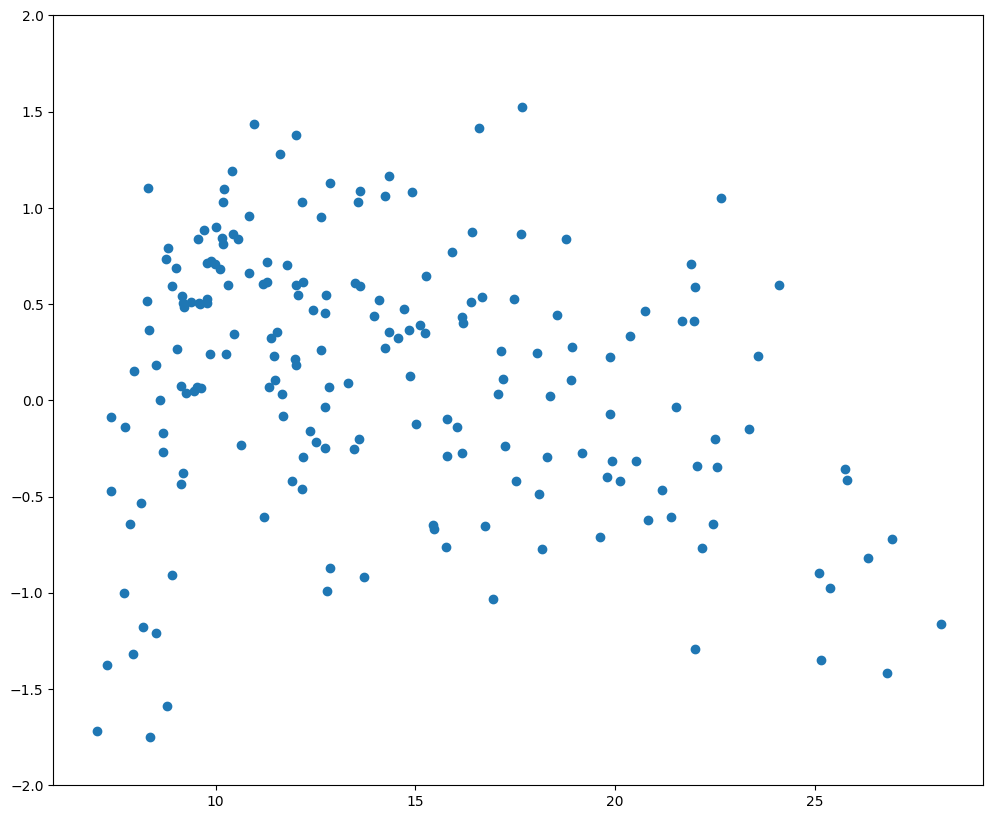

In [15]:
# Looks like a non-random shape. data appears slightly non-linear though not too bad
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-2, 2);

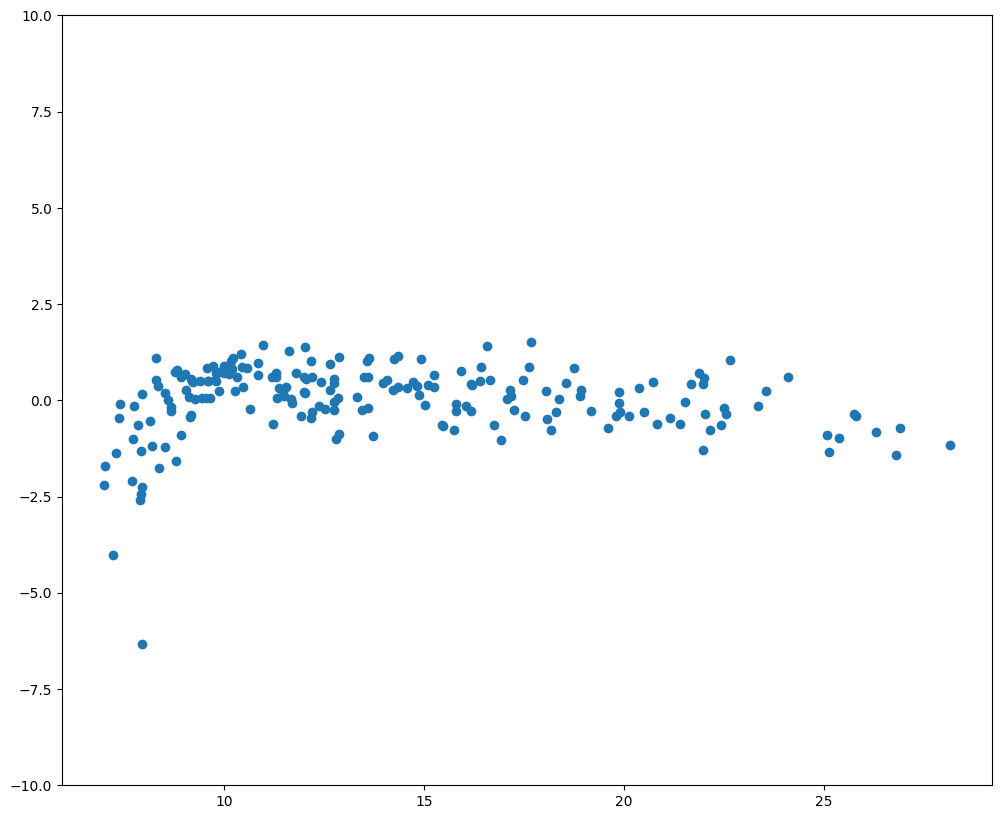

In [16]:
# Looks like a non-random shape. data appears slightly non-linear though not too bad
plt.figure(figsize=(12,10))
plt.scatter(results.predict(adv), resid)
plt.ylim(-10, 10);

### **Lab**

In the book, the lab focuses on performing a linear regression on the Boston dataset. We will do so using seaborn, statsmodels and scikit learn

In [17]:
boston = pd.read_csv("/content/gdrive/MyDrive/STQD 6024 Machine Learning/boston.csv")
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


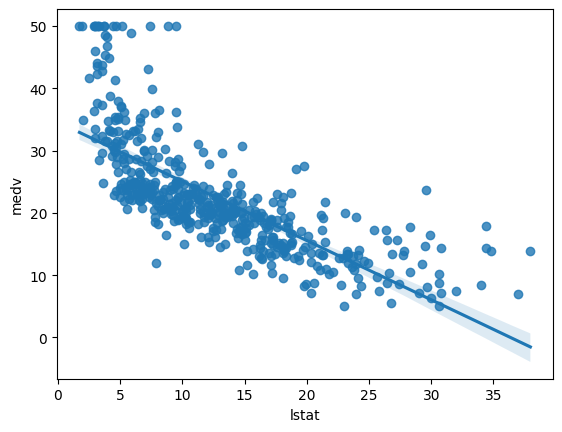

In [18]:
sns.regplot(x='lstat', y='medv', data=boston);

The scatter plot with a regression line overlaid, generated using sns.regplot(x='lstat', y='medv', data=boston), shows the relationship between the lstat (percentage of lower status of the population) predictor variable and the medv (median value of owner-occupied homes in $1000s) response variable. Here's what the plot tells us:

**Observations**
1. **Negative Relationship:**

- There is a clear negative relationship between lstat and medv.
- As lstat increases, medv tends to decrease.
2. **Non-linearity:**

- The data points do not follow a perfectly straight line, indicating some degree of non-linearity.
- However, the linear regression line provides a reasonable fit, capturing the overall downward trend.
3. **Variance in Residuals:**

- The spread of the data points around the regression line is wider for lower values of lstat and narrower for higher values of lstat.
- This indicates heteroscedasticity, where the variance of the errors differs across levels of lstat.

**Interpretation**
1. **Strong Negative Correlation:**

- The scatter plot suggests that lstat is a strong predictor of medv, with higher percentages of lower-status individuals associated with lower median home values.
2. **Possible Need for Transformation:**

- Given the curvature in the data, a simple linear model might not fully capture the relationship between lstat and medv.
- Polynomial regression or another form of non-linear modeling might better fit the data.

**Conclusion**

The plot illustrates a significant and negative relationship between lstat and medv, with some indication of non-linearity and heteroscedasticity. These insights suggest that while a linear regression model provides a basic understanding of the relationship, further exploration with non-linear models might be necessary for a more accurate representation.

In [19]:
# statsmodels
results = smf.ols('medv ~ lstat', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.08e-88
Time:                        01:11:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Coefficients Table**
1. **Intercept: 34.5538**

- This is the estimated average value of medv when lstat is zero. The intercept is statistically significant (p-value = 0.000).
2. **lstat: -0.9500**

-This is the estimated change in medv for each one-unit increase in lstat. The negative coefficient indicates that as lstat increases, medv decreases. The coefficient is statistically significant (p-value = 0.000).

**Interpretation of Key Findings**
1. **Statistical Significance:**

Both the intercept and lstat coefficients are statistically significant, indicating that lstat is a significant predictor of medv.
2. **Direction of Relationship:**

- The negative coefficient for lstat (-0.9500) suggests that as the percentage of lower-status population increases, the median home value decreases.
3. **Model Fit:**

- The R-squared value of 0.544 indicates that the model explains about 54.4% of the variance in medv. This is a moderate level of explanation, suggesting that other factors also influence medv.
4. **Residuals and Model Diagnostics:**

- The significant Omnibus and Jarque-Bera tests indicate that the residuals are not normally distributed.
- The Durbin-Watson statistic suggests potential positive autocorrelation in the residuals.
- Skewness and kurtosis values indicate asymmetry and heavy tails in the residuals.

**Conclusion**

The simple linear regression model medv ~ lstat provides a moderate fit, explaining 54.4% of the variance in median home values based on the percentage of lower-status population. The negative relationship indicates that higher lstat values are associated with lower medv values. However, the residual diagnostics suggest issues with normality and potential autocorrelation, indicating that further model refinement or additional predictors may be necessary to improve the model fit.

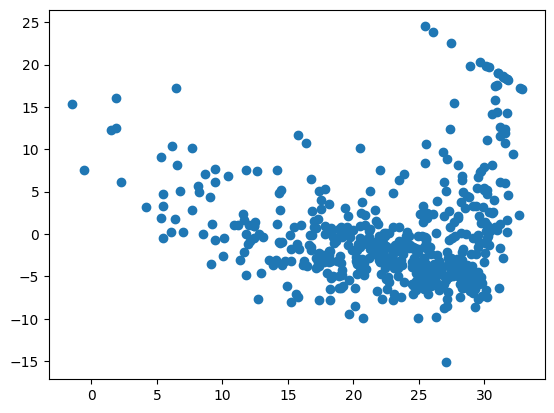

In [20]:
# look at residuals
# Yikes. lots of nonlinearity. Need a different model
plt.scatter(results.fittedvalues, results.resid);

In [21]:
# Get all columns. No easy way to do this like in R
# Mostly highly significant variables
string_cols = ' + '.join(boston.columns[:-1])
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 24 May 2024   Prob (F-statistic):          6.72e-135
Time:                        01:17:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# remove age
string_cols = ' + '.join(boston.columns[:-1].difference(['age']))
results = smf.ols('medv ~ {}'.format(string_cols), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 24 May 2024   Prob (F-statistic):          6.08e-136
Time:                        01:18:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
black          0.0093      0.003      3.481      0.001       0.004       0.015
chas           2.6890      0.860      3.128      0.002       1.000       4.378
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
rad            0.3058      0.066      4.627      0.000       0.176       0.436
rm             3.8144      0.408      9.338      0.000       3.012       4.617
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
zn             0.0463      0.014      3.404      0.001       0.020       0.073
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####**Summary of Differences and Key Metrics**
**Common Metrics**

**R-squared:** 0.741 for both models, indicating that 74.1% of the variance in medv is explained by the predictors in both models.
**Adj. R-squared:** 0.734 for both models, showing that the models fit similarly after adjusting for the number of predictors.
**Prob (F-statistic):** Very low in both models, indicating that the models are statistically significant.

**Key Differences**
1. **Degrees of Freedom:**

- **Model 1 (Including age):**
  - Df Model: 13
  - Df Residuals: 492

- **Model 2 (Excluding age):**
 - Df Model: 12
 - Df Residuals: 493
2. **AIC and BIC:**

- **Model 1 (Including age):**
  - AIC: 3026
  - BIC: 3085
- **Model 2 (Excluding age):**
  - AIC: 3024
  - BIC: 3079
= **Interpretation:** Slightly lower AIC and BIC in Model 2, suggesting a marginally better fit when **age** is excluded.
3. **Coefficients and Significance:**

- **Model 1 (Including age):**
  - age: Coefficient = 0.0007, p-value = 0.958 (not significant)
- **Model 2 (Excluding age):**
  - age is excluded.
4. **Effect on Other Predictors:**

- **Model 1 (Including age):**
  - Some predictors like dis, rm, nox, ptratio, lstat, etc., show significant p-values, indicating they are important predictors.
- **Model 2 (Excluding age):**
- The coefficients and significance of the other predictors remain largely unchanged, suggesting that **age** does not contribute significantly to the model.
5. **Model Diagnostics:**

- **Omnibus:** Both models show a significant Omnibus test, indicating non-normality of residuals.
- **Durbin-Watson:** Both models have a value around 1.078, indicating potential positive autocorrelation.
- **Jarque-Bera (JB):** Both models have significant JB tests, indicating non-normality of residuals.
- **Condition Number:** Both models have large condition numbers (around 1.5e+04), indicating potential multicollinearity issues.

**Interpretation**

- **Including age (Model 1):**

  - The **age** variable has a very high p-value (0.958), indicating it is not a significant predictor of medv. Including **age** does not improve the model fit and may contribute to multicollinearity issues.
- **Excluding age (Model 2):**

  - Excluding **age** results in slightly better AIC and BIC values, suggesting a marginally better model fit.
  - The significance and coefficients of other predictors remain stable, indicating that **age** is not adding useful information to the model.

**Conclusion**

- Both models perform similarly in terms of overall fit (R-squared and Adj. R-squared).
- **Model 2** (excluding **age**) has slightly better AIC and BIC values and does not suffer from an insignificant predictor (**age**), making it a marginally better choice.
- Multicollinearity and non-normality of residuals are issues in both models, suggesting further investigation and potential model adjustments are needed.

By removing the **age** variable, we simplify the model without sacrificing explanatory power, leading to a more parsimonious model. This makes Model 2 a preferable choice based on the provided metrics and diagnostics.

In [23]:
# Interaction
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 24 May 2024   Prob (F-statistic):           4.86e-88
Time:                        01:31:59   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



---


**Model 1: Interaction between lstat and age**

**Coefficients**

- Intercept: 36.0885
- lstat: -1.3921 (significant)
- age: -0.0007 (not significant)
- lstat:age: 0.0042 (significant)

**Interpretation**

- **Interaction:** The interaction term (lstat:age) is significant, suggesting that the effect of lstat on medv depends on the level of age.
- **Multicollinearity:** High condition number (6.88e+03) indicates potential multicollinearity issues.

In [24]:
# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 24 May 2024   Prob (F-statistic):          1.56e-112
Time:                        01:32:07   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



---


**Model 2: Polynomial term for lstat**

**Coefficients**

- Intercept: 42.8620
- lstat: -2.3328 (significant)
- np.power(lstat, 2): 0.0435 (significant)

**Interpretation**

- Polynomial Term: The quadratic term (np.power(lstat, 2)) is significant, indicating a non-linear relationship between lstat and medv.
- Better Fit: Higher R-squared (0.641) compared to Model 1, indicating a better fit.

In [25]:
# Interaction
results = smf.ols('medv ~ lstat *age', data=boston, drop_cols='age').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     314.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.42e-89
Time:                        01:32:16   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3276.
Df Residuals:                     503   BIC:                             3289.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0415      0.691     52.133      0.000      34.683      37.400
lstat         -1.3882      0.127    -10.938      0.000      -1.638      -1.139
lstat:age      0.0041      0.001      3.621      0.000       0.002       0.006
==============================================================================
Omnibus:                      135.311   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.609
Skew:                           1.415   Prob(JB):                     6.45e-65
Kurtosis:                       5.452   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



---


**Model 3: Interaction between lstat and age (excluding age main effect)**

**Coefficients**
- Intercept: 36.0415
- lstat: -1.3882 (significant)
- lstat:age: 0.0041 (significant)

**Interpretation**

- Interaction: The interaction term (lstat:age) is significant, similar to Model 1.
- Excluding age Main Effect: The age variable is dropped, which slightly improves AIC and BIC compared to Model 1, but overall fit remains the same.



---


**Key Differences and Insights**

1. **R-squared and Fit:**

- **Model 2** has the highest R-squared (0.641), indicating the best fit among the three models.
- **Models 1 and 3** have the same R-squared (0.556) and similar fit.
2. **Significance of Interaction Terms:**

- **Model 1:** Includes both lstat, age, and their interaction. age is not significant.
- **Model 2:** Uses a polynomial term for lstat, showing a significant non-linear relationship.
- **Model 3:** Excludes the main effect of age, only includes lstat and the interaction term, which simplifies the model slightly.
3. **Multicollinearity:**

- **Model 1** has a high condition number (6.88e+03), indicating potential multicollinearity.
- **Model 2:** Lower condition number (1.13e+03) but still indicates some multicollinearity.
- **Model 3:** Lower condition number (3.25e+03) compared to Model 1, but still indicates multicollinearity.
4. **Model Complexity and Fit:**

- **Model 2** provides a better fit with a polynomial term, capturing the non-linear relationship between lstat and medv.
- **Model 3** simplifies the model by excluding the age main effect, slightly improving AIC and BIC compared to Model 1.

**Conclusion**

- **Model 2:** Best overall fit with the highest R-squared, capturing non-linear relationships.
- **Model 3:** Simplifies the model by excluding the age main effect while maintaining a similar fit to Model 1.
- **Model 1:** Includes all terms but shows that age is not a significant predictor.

Each model provides different insights into the relationship between lstat, age, and medv, with Model 2 showing the best overall performance by capturing non-linear effects.